In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error,mean_squared_error

In [ ]:
df=pd.read_csv("StudentsPerformance.csv")
df.sample(3)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
751,male,group E,some college,standard,none,68,72,65
553,male,group D,some college,free/reduced,none,77,62,64
602,female,group E,some college,standard,none,76,78,80


In [ ]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
df.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [ ]:
df.shape

(1000, 8)

In [ ]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [ ]:
df["gender"].value_counts()

,count
gender,
female,518
male,482


In [ ]:
df["gender"].unique()

array(['female', 'male'], dtype=object)

In [ ]:
df["gender"].value_counts()

,count
gender,
female,518
male,482


In [ ]:
df.dtypes

,0
gender,object
race/ethnicity,object
parental level of education,object
lunch,object
test preparation course,object
math score,int64
reading score,int64
writing score,int64


In [ ]:
df.isnull().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.sample()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
385,female,group E,some college,standard,none,67,76,75


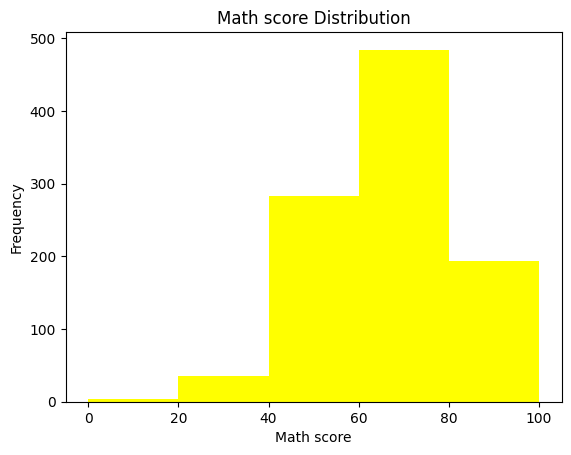

In [ ]:
plt.hist(df["math score"], bins = 5,color="yellow")
plt.title("Math score Distribution")
plt.xlabel("Math score")
plt.ylabel("Frequency")
plt.show()

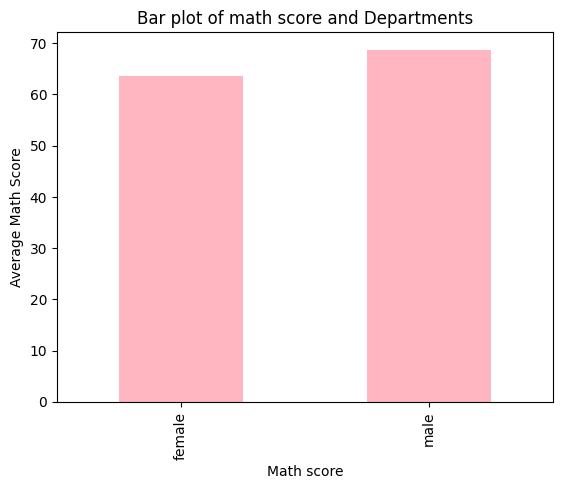

In [ ]:
df.groupby("gender")["math score"].mean().plot(kind="bar",color="lightpink")
plt.title("Bar plot of math score and Departments")
plt.xlabel("Math score")
plt.ylabel("Average Math Score")
plt.show()

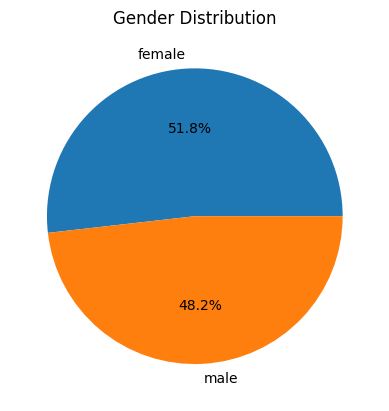

In [ ]:
df["gender"].value_counts().plot(kind = "pie", autopct="%1.1f%%")
plt.title("Gender Distribution")
plt.ylabel("")
plt.show()

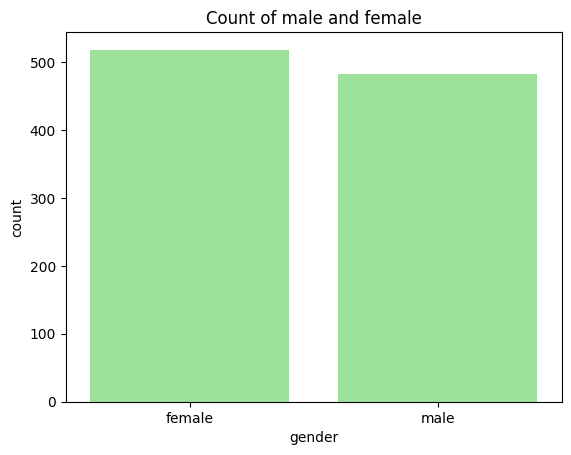

In [ ]:
sns.countplot(x="gender", data=df,color="lightgreen")
plt.title("Count of male and female")
plt.show()

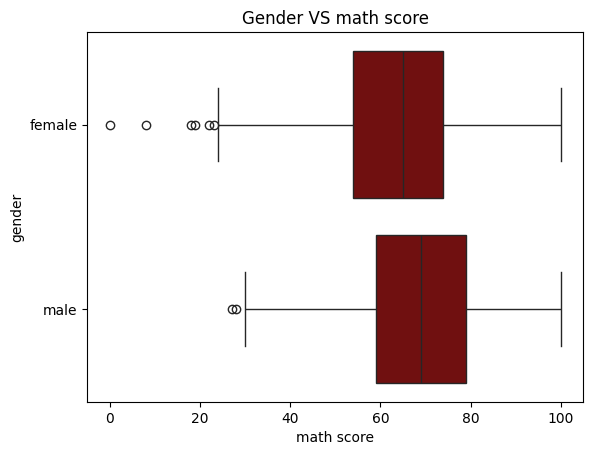

In [ ]:
sns.boxplot(y="gender", x="math score", data=df,color="maroon")
plt.title("Gender VS math score")
plt.show()

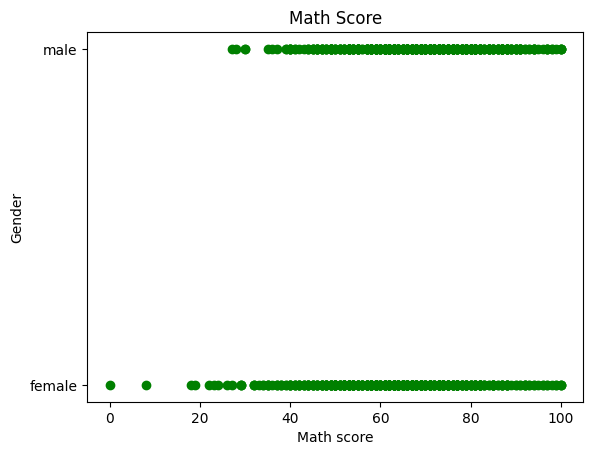

In [ ]:
plt.scatter(df["math score"], df["gender"],color="green")
plt.xlabel("Math score")
plt.ylabel("Gender")
plt.title("Math Score")
plt.show()

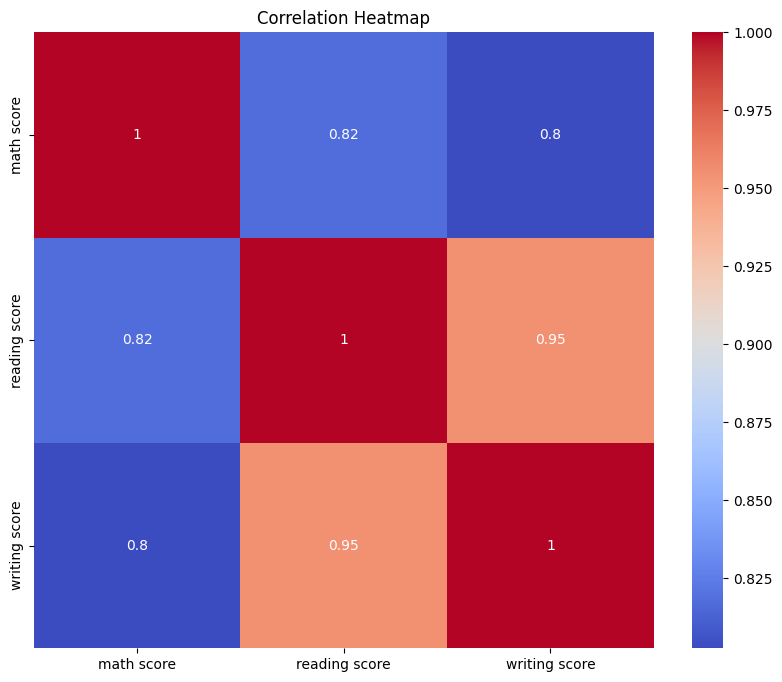

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [ ]:
#Encoding
df = pd.get_dummies(df, drop_first=True)
df

,math score,reading score,writing score,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none
0,72,72,74,False,True,False,False,False,True,False,False,False,False,True,True
1,69,90,88,False,False,True,False,False,False,False,False,True,False,True,False
2,90,95,93,False,True,False,False,False,False,False,True,False,False,True,True
3,47,57,44,True,False,False,False,False,False,False,False,False,False,False,True
4,76,78,75,True,False,True,False,False,False,False,False,True,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,88,99,95,False,False,False,False,True,False,False,True,False,False,True,False
996,62,55,55,True,False,True,False,False,False,True,False,False,False,False,True
997,59,71,65,False,False,True,False,False,False,True,False,False,False,False,False
998,68,78,77,False,False,False,True,False,False,False,False,True,False,True,False


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
y = df['math score']
x = df.drop('math score', axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 3)

In [ ]:
#Scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [ ]:
X_single = df[['reading score']]
y_single = df['math score']

X_train_s, X_test_s, y_train_s, y_test_s = train_test_split( X_single, y_single, test_size=0.2, random_state=42)

lr_single = LinearRegression()
lr_single.fit(X_train_s, y_train_s)

y_pred_single = lr_single.predict(X_test_s)

print("R2 Score:", r2_score(y_test_s, y_pred_single))

R2 Score: 0.6804469009921283


In [ ]:
#Encoding
df = pd.get_dummies(df, drop_first=True)
df

,math score,reading score,writing score,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none
0,72,72,74,False,True,False,False,False,True,False,False,False,False,True,True
1,69,90,88,False,False,True,False,False,False,False,False,True,False,True,False
2,90,95,93,False,True,False,False,False,False,False,True,False,False,True,True
3,47,57,44,True,False,False,False,False,False,False,False,False,False,False,True
4,76,78,75,True,False,True,False,False,False,False,False,True,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,88,99,95,False,False,False,False,True,False,False,True,False,False,True,False
996,62,55,55,True,False,True,False,False,False,True,False,False,False,False,True
997,59,71,65,False,False,True,False,False,False,True,False,False,False,False,False
998,68,78,77,False,False,False,True,False,False,False,False,True,False,True,False


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
#Splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=42)

In [ ]:
#Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#Linear Regression

Ir=LinearRegression()
Ir.fit(x_train_scaled, y_train)

y_pred_lr = Ir.predict(x_test)

print("Linear R2:", r2_score(y_test, y_pred_lr))

Linear R2: -0.03101930926715002


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print("MAE:",mean_absolute_error(y_test_s,y_pred_lr))
print("MSE:",mean_squared_error(y_test_s,y_pred_lr))
print("RMSE:",np.sqrt(mean_squared_error(y_test_s,y_pred_lr)))

MAE: 12.404854512337945
MSE: 250.88658908617347
RMSE: 15.839399896655602


# **Assignment-5**

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler

In [ ]:
df = pd.read_csv("assignment5.csv")
df.sample(5)

,Study_Hours,Attendance_Percentage,Previous_Score,Sleep_Hours,Internet_Usage_Hours,Gender,Parental_Education,Final_Score
2,3,78.0,65.0,6.0,4.0,Male,Non-Graduate,68
16,2,72.0,63.0,5.0,5.0,Female,Non-Graduate,65
12,6,90.0,82.0,7.0,2.0,Female,Graduate,85
10,8,98.0,90.0,8.0,1.0,Male,Graduate,92
31,8,97.0,91.0,8.0,1.0,Male,Graduate,93


In [ ]:
df.head()

,Study_Hours,Attendance_Percentage,Previous_Score,Sleep_Hours,Internet_Usage_Hours,Gender,Parental_Education,Final_Score
0,4,85.0,72.0,7.0,3.0,Male,Graduate,75
1,6,90.0,80.0,8.0,2.0,Female,Graduate,82
2,3,78.0,65.0,6.0,4.0,Male,Non-Graduate,68
3,5,88.0,75.0,7.0,3.0,Female,Graduate,79
4,2,70.0,60.0,5.0,5.0,Male,Non-Graduate,62


In [ ]:
df.tail()

,Study_Hours,Attendance_Percentage,Previous_Score,Sleep_Hours,Internet_Usage_Hours,Gender,Parental_Education,Final_Score
35,7,92.0,86.0,8.0,2.0,Male,Graduate,88
36,4,83.0,71.0,6.0,4.0,Female,Graduate,75
37,5,86.0,76.0,7.0,3.0,Male,Graduate,79
38,6,91.0,82.0,7.0,2.0,Female,Graduate,85
39,3,73.0,66.0,6.0,5.0,Male,Non-Graduate,68


In [ ]:
df.shape

(40, 8)

In [ ]:
df.describe()

,Study_Hours,Attendance_Percentage,Previous_Score,Sleep_Hours,Internet_Usage_Hours,Final_Score
count,40.000000,39.000000,39.000000,39.000000,39.000000,40.000000
mean,4.675000,83.692308,73.974359,6.589744,3.384615,77.000000
std,1.926702,9.605793,10.085130,1.044231,1.479961,10.028165
min,1.000000,60.000000,50.000000,4.000000,1.000000,55.000000
25%,3.000000,76.500000,66.500000,6.000000,2.000000,68.750000
50%,5.000000,86.000000,74.000000,7.000000,3.000000,78.500000
75%,6.000000,90.500000,80.500000,7.000000,4.000000,84.250000
max,8.000000,99.000000,92.000000,8.000000,7.000000,94.000000


In [ ]:
df["Study_Hours"].dtype

dtype('int64')

In [ ]:
df["Gender"].unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
df["Study_Hours"].value_counts()

,count
Study_Hours,
6,8
5,7
4,6
3,6
2,4
7,4
8,3
1,2


In [ ]:
df.dtypes

,0
Study_Hours,int64
Attendance_Percentage,float64
Previous_Score,float64
Sleep_Hours,float64
Internet_Usage_Hours,float64
Gender,object
Parental_Education,object
Final_Score,int64


In [ ]:
df.isnull().sum()

,0
Study_Hours,0
Attendance_Percentage,1
Previous_Score,1
Sleep_Hours,1
Internet_Usage_Hours,1
Gender,0
Parental_Education,0
Final_Score,0


In [ ]:
df["Attendance_Percentage"].fillna(df["Attendance_Percentage"].mean(),inplace=True)

/tmp/ipython-input-2074897765.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Attendance_Percentage"].fillna(df["Attendance_Percentage"].mean(),inplace=True)


In [ ]:
df["Previous_Score"].fillna(df["Previous_Score"].mean(),inplace=True)

/tmp/ipython-input-2336201049.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Previous_Score"].fillna(df["Previous_Score"].mean(),inplace=True)


In [ ]:
df["Sleep_Hours"].fillna(df["Sleep_Hours"].mean(),inplace=True)

/tmp/ipython-input-1470960116.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Sleep_Hours"].fillna(df["Sleep_Hours"].mean(),inplace=True)


In [ ]:
df["Internet_Usage_Hours"].fillna(df["Internet_Usage_Hours"].mean(),inplace=True)

/tmp/ipython-input-2369523781.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Internet_Usage_Hours"].fillna(df["Internet_Usage_Hours"].mean(),inplace=True)


In [ ]:
df.duplicated().sum()

np.int64(0)

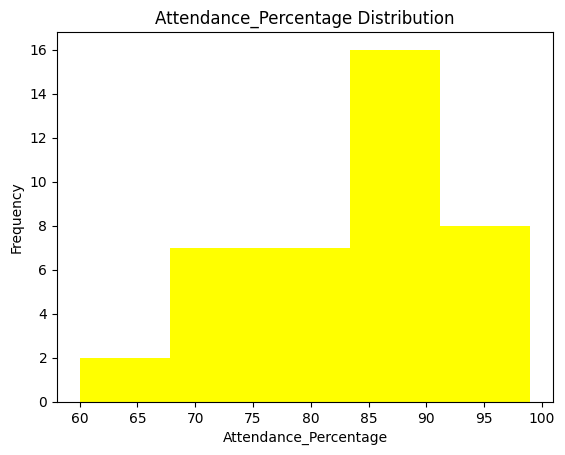

In [ ]:
plt.hist(df["Attendance_Percentage"], bins = 5,color="yellow")
plt.title("Attendance_Percentage Distribution")
plt.xlabel("Attendance_Percentage")
plt.ylabel("Frequency")
plt.show()

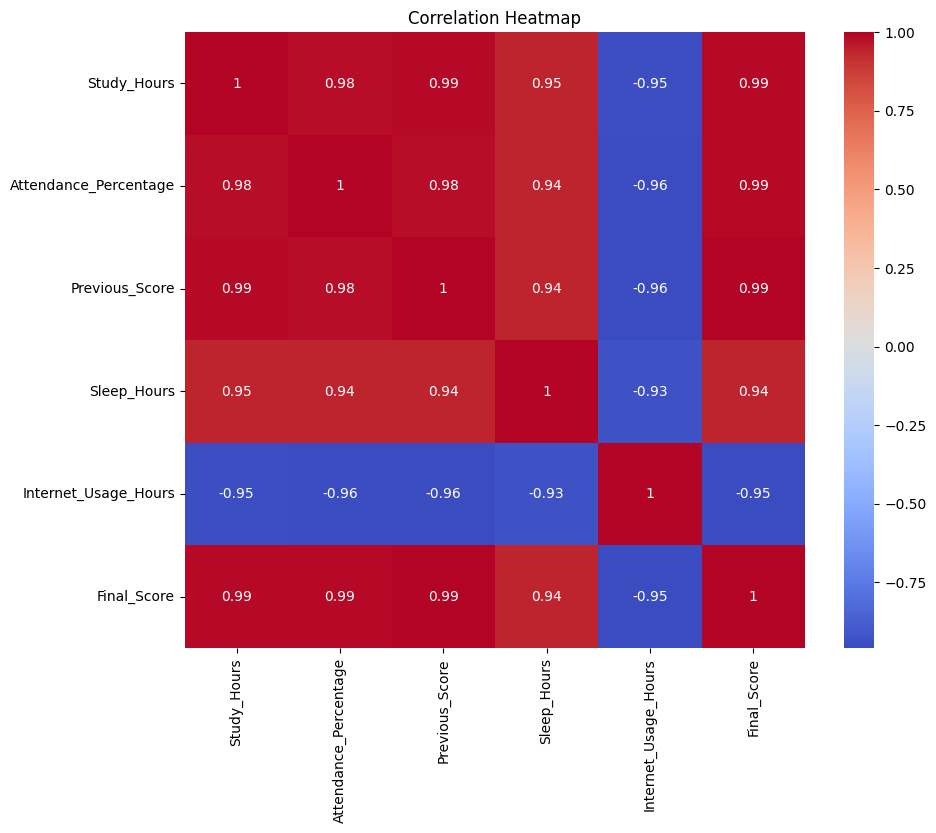

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
df

,Study_Hours,Attendance_Percentage,Previous_Score,Sleep_Hours,Internet_Usage_Hours,Gender,Parental_Education,Final_Score
0,4,85.000000,72.000000,7.000000,3.000000,Male,Graduate,75
1,6,90.000000,80.000000,8.000000,2.000000,Female,Graduate,82
2,3,78.000000,65.000000,6.000000,4.000000,Male,Non-Graduate,68
3,5,88.000000,75.000000,7.000000,3.000000,Female,Graduate,79
4,2,70.000000,60.000000,5.000000,5.000000,Male,Non-Graduate,62
5,7,95.000000,85.000000,8.000000,2.000000,Female,Graduate,88
6,6,92.000000,78.000000,7.000000,3.000000,Male,Graduate,83
7,4,80.000000,70.000000,6.000000,4.000000,Female,Non-Graduate,72
8,5,85.000000,74.000000,7.000000,3.000000,Male,Graduate,78
9,3,75.000000,68.000000,6.000000,5.000000,Female,Non-Graduate,70


In [ ]:
#Encoding
df = pd.get_dummies(df, drop_first=True)
df

,Study_Hours,Attendance_Percentage,Previous_Score,Sleep_Hours,Internet_Usage_Hours,Final_Score,Gender_Male,Parental_Education_Non-Graduate
0,4,85.000000,72.000000,7.000000,3.000000,75,True,False
1,6,90.000000,80.000000,8.000000,2.000000,82,False,False
2,3,78.000000,65.000000,6.000000,4.000000,68,True,True
3,5,88.000000,75.000000,7.000000,3.000000,79,False,False
4,2,70.000000,60.000000,5.000000,5.000000,62,True,True
5,7,95.000000,85.000000,8.000000,2.000000,88,False,False
6,6,92.000000,78.000000,7.000000,3.000000,83,True,False
7,4,80.000000,70.000000,6.000000,4.000000,72,False,True
8,5,85.000000,74.000000,7.000000,3.000000,78,True,False
9,3,75.000000,68.000000,6.000000,5.000000,70,False,True


In [ ]:
#separation
x = df.drop("Final_Score", axis=1)
y = df["Final_Score"]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 3)

In [ ]:
#Scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [ ]:
X_single = df[['Study_Hours']]
y_single = df['Final_Score']

X_train_s, X_test_s, y_train_s, y_test_s = train_test_split( X_single, y_single, test_size=0.2, random_state=42)

lr_single = LinearRegression()
lr_single.fit(X_train_s, y_train_s)

y_pred_single = lr_single.predict(X_test_s)

print("R2 Score:", r2_score(y_test_s, y_pred_single))

R2 Score: 0.9641080063123103


In [ ]:
#Linear Regression

Ir=LinearRegression()
Ir.fit(x_train_scaled, y_train)

y_pred_lr = Ir.predict(x_test)

print("Linear R2:", r2_score(y_test, y_pred_lr))

Linear R2: 0.9833385895727365


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print("MAE:",mean_absolute_error(y_test_s,y_pred_lr))
print("MSE:",mean_squared_error(y_test_s,y_pred_lr))
print("RMSE:",np.sqrt(mean_squared_error(y_test_s,y_pred_lr)))

MAE: 8.716968827309595
MSE: 124.08711109990159
RMSE: 11.139439442804184


In [ ]:
ridge=Ridge(alpha=1.0)
ridge.fit(x_train_scaled, y_train)

y_pred_ridge=ridge.predict(x_test)

print("Ridge R2:",r2_score(y_test,y_pred_ridge))

Ridge R2: 0.9811987719559015


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print("MAE:",mean_absolute_error(y_test_s,y_pred_ridge))
print("MSE:",mean_squared_error(y_test_s,y_pred_ridge))
print("RMSE:",np.sqrt(mean_squared_error(y_test_s,y_pred_ridge)))

MAE: 8.717494116265009
MSE: 123.78543292124454
RMSE: 11.125890208034795


In [ ]:
lasso=Lasso(alpha=1.0)
lasso.fit(x_train_scaled, y_train)

y_pred_lasso=lasso.predict(x_test)

print("Lassso R2:",r2_score(y_test,y_pred_lasso))

Lassso R2: 0.9577748891331839


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print("MAE:",mean_absolute_error(y_test,y_pred_lasso1))
print("MSE:",mean_squared_error(y_test,y_pred_lasso1))
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred_lasso1)))

MAE: 71.5
MSE: 5174.859375
RMSE: 71.93649543173478


# **Assignment-6**

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression

In [ ]:
df = pd.read_csv("assignment6.csv")
df

,House_Size_sqft,Bedrooms,Age_of_House,Distance_to_City_km,Nearby_Schools,Furnishing,Parking,Monthly_Rent
0,850,2,10.0,5.0,3.0,Furnished,Yes,18000
1,1200,3,5.0,8.0,4.0,Semi,Yes,24000
2,650,1,15.0,12.0,2.0,Unfurnished,No,12000
3,900,2,8.0,6.0,3.0,Furnished,Yes,19000
4,1100,3,7.0,10.0,4.0,Semi,Yes,23000
5,700,1,20.0,15.0,1.0,Unfurnished,No,11000
6,1300,3,4.0,7.0,5.0,Furnished,Yes,26000
7,800,2,12.0,9.0,3.0,Semi,No,17000
8,950,2,9.0,6.0,3.0,Furnished,Yes,20000
9,1000,2,6.0,8.0,4.0,Semi,Yes,21000


In [ ]:
df.head()

,House_Size_sqft,Bedrooms,Age_of_House,Distance_to_City_km,Nearby_Schools,Furnishing,Parking,Monthly_Rent
0,850,2,10.0,5.0,3.0,Furnished,Yes,18000
1,1200,3,5.0,8.0,4.0,Semi,Yes,24000
2,650,1,15.0,12.0,2.0,Unfurnished,No,12000
3,900,2,8.0,6.0,3.0,Furnished,Yes,19000
4,1100,3,7.0,10.0,4.0,Semi,Yes,23000


In [ ]:
df.tail()

,House_Size_sqft,Bedrooms,Age_of_House,Distance_to_City_km,Nearby_Schools,Furnishing,Parking,Monthly_Rent
35,700,1,15.0,14.0,2.0,Unfurnished,No,11200
36,1350,4,4.0,6.0,5.0,Furnished,Yes,29500
37,950,2,9.0,8.0,3.0,Semi,Yes,19800
38,1080,3,6.0,8.0,4.0,Furnished,Yes,23000
39,820,2,12.0,11.0,3.0,Semi,No,17000


In [ ]:
df.shape

(40, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   House_Size_sqft      40 non-null     int64  
 1   Bedrooms             40 non-null     int64  
 2   Age_of_House         39 non-null     float64
 3   Distance_to_City_km  39 non-null     float64
 4   Nearby_Schools       39 non-null     float64
 5   Furnishing           40 non-null     object 
 6   Parking              40 non-null     object 
 7   Monthly_Rent         40 non-null     int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 2.6+ KB


In [ ]:
df.describe()

,House_Size_sqft,Bedrooms,Age_of_House,Distance_to_City_km,Nearby_Schools,Monthly_Rent
count,40.000000,40.000000,39.000000,39.000000,39.000000,40.000000
mean,1001.500000,2.350000,9.025641,8.717949,3.435897,20360.000000
std,240.069968,0.948683,4.759960,2.955358,1.252258,6047.029362
min,600.000000,1.000000,2.000000,4.000000,1.000000,10500.000000
25%,835.000000,2.000000,5.500000,7.000000,3.000000,17375.000000
50%,965.000000,2.000000,8.000000,8.000000,3.000000,19900.000000
75%,1185.000000,3.000000,11.500000,10.000000,4.000000,24000.000000
max,1500.000000,4.000000,20.000000,15.000000,6.000000,33000.000000


In [ ]:
df["Age_of_House"].dtype

dtype('float64')

In [ ]:
df["Bedrooms"].unique()

array([2, 3, 1, 4])

In [ ]:
df["Age_of_House"].value_counts()

,count
Age_of_House,
6.0,5
5.0,4
10.0,3
8.0,3
4.0,3
7.0,3
9.0,3
15.0,2
12.0,2


In [ ]:
df.dtypes

,0
House_Size_sqft,int64
Bedrooms,int64
Age_of_House,float64
Distance_to_City_km,float64
Nearby_Schools,float64
Furnishing,object
Parking,object
Monthly_Rent,int64


In [ ]:
df.isnull().sum()

,0
House_Size_sqft,0
Bedrooms,0
Age_of_House,1
Distance_to_City_km,1
Nearby_Schools,1
Furnishing,0
Parking,0
Monthly_Rent,0


In [ ]:
df["Age_of_House"].fillna(df["Age_of_House"].mean(),inplace=True)

/tmp/ipython-input-2437619472.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age_of_House"].fillna(df["Age_of_House"].mean(),inplace=True)


In [ ]:
df["Nearby_Schools"].fillna(df["Nearby_Schools"].mean(),inplace=True)

/tmp/ipython-input-3658963149.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Nearby_Schools"].fillna(df["Nearby_Schools"].mean(),inplace=True)


In [ ]:
df["Distance_to_City_km"].fillna(df["Distance_to_City_km"].mean(),inplace=True)

/tmp/ipython-input-503351905.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Distance_to_City_km"].fillna(df["Distance_to_City_km"].mean(),inplace=True)


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df

,House_Size_sqft,Bedrooms,Age_of_House,Distance_to_City_km,Nearby_Schools,Furnishing,Parking,Monthly_Rent
0,850,2,10.000000,5.000000,3.000000,Furnished,Yes,18000
1,1200,3,5.000000,8.000000,4.000000,Semi,Yes,24000
2,650,1,15.000000,12.000000,2.000000,Unfurnished,No,12000
3,900,2,8.000000,6.000000,3.000000,Furnished,Yes,19000
4,1100,3,7.000000,10.000000,4.000000,Semi,Yes,23000
5,700,1,20.000000,15.000000,1.000000,Unfurnished,No,11000
6,1300,3,4.000000,7.000000,5.000000,Furnished,Yes,26000
7,800,2,12.000000,9.000000,3.000000,Semi,No,17000
8,950,2,9.000000,6.000000,3.000000,Furnished,Yes,20000
9,1000,2,6.000000,8.000000,4.000000,Semi,Yes,21000


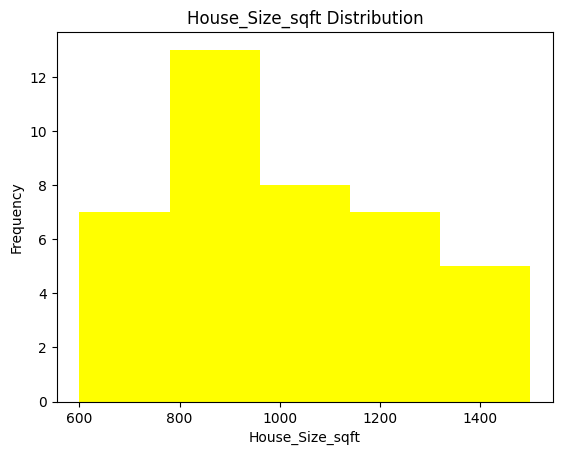

In [ ]:
plt.hist(df["House_Size_sqft"], bins = 5,color="yellow")
plt.title("House_Size_sqft Distribution")
plt.xlabel("House_Size_sqft")
plt.ylabel("Frequency")
plt.show()

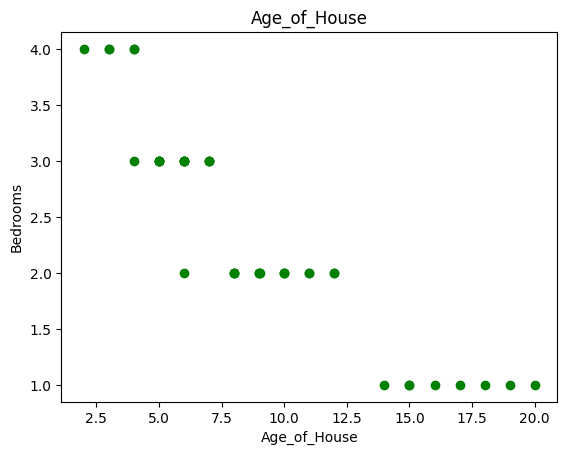

In [ ]:
plt.scatter(df["Age_of_House"], df["Bedrooms"],color="green")
plt.xlabel("Age_of_House")
plt.ylabel("Bedrooms")
plt.title("Age_of_House")
plt.show()

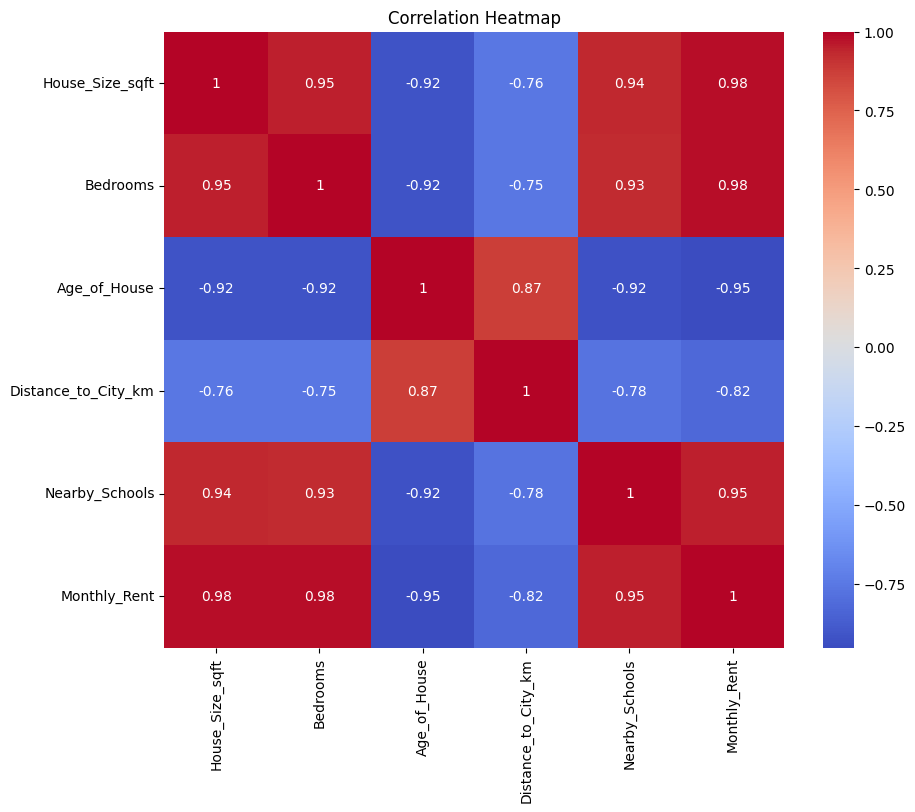

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
df

,House_Size_sqft,Bedrooms,Age_of_House,Distance_to_City_km,Nearby_Schools,Furnishing,Parking,Monthly_Rent
0,850,2,10.000000,5.000000,3.000000,Furnished,Yes,18000
1,1200,3,5.000000,8.000000,4.000000,Semi,Yes,24000
2,650,1,15.000000,12.000000,2.000000,Unfurnished,No,12000
3,900,2,8.000000,6.000000,3.000000,Furnished,Yes,19000
4,1100,3,7.000000,10.000000,4.000000,Semi,Yes,23000
5,700,1,20.000000,15.000000,1.000000,Unfurnished,No,11000
6,1300,3,4.000000,7.000000,5.000000,Furnished,Yes,26000
7,800,2,12.000000,9.000000,3.000000,Semi,No,17000
8,950,2,9.000000,6.000000,3.000000,Furnished,Yes,20000
9,1000,2,6.000000,8.000000,4.000000,Semi,Yes,21000


In [ ]:
#Encoding
df = pd.get_dummies(df, drop_first=True)
df

,House_Size_sqft,Bedrooms,Age_of_House,Distance_to_City_km,Nearby_Schools,Monthly_Rent,Furnishing_Semi,Furnishing_Unfurnished,Parking_Yes
0,850,2,10.000000,5.000000,3.000000,18000,False,False,True
1,1200,3,5.000000,8.000000,4.000000,24000,True,False,True
2,650,1,15.000000,12.000000,2.000000,12000,False,True,False
3,900,2,8.000000,6.000000,3.000000,19000,False,False,True
4,1100,3,7.000000,10.000000,4.000000,23000,True,False,True
5,700,1,20.000000,15.000000,1.000000,11000,False,True,False
6,1300,3,4.000000,7.000000,5.000000,26000,False,False,True
7,800,2,12.000000,9.000000,3.000000,17000,True,False,False
8,950,2,9.000000,6.000000,3.000000,20000,False,False,True
9,1000,2,6.000000,8.000000,4.000000,21000,True,False,True


In [ ]:
#separation
x = df.drop("Furnishing_Semi", axis=1)
y = df["Furnishing_Semi"]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 3)

In [ ]:
#Scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [ ]:
X_single = df[['House_Size_sqft']]
y_single = df['Monthly_Rent']

X_train_s, X_test_s, y_train_s, y_test_s = train_test_split( X_single, y_single, test_size=0.2, random_state=42)

lr_single = LinearRegression()
lr_single.fit(X_train_s, y_train_s)

y_pred_single = lr_single.predict(X_test_s)

print("R2 Score:", r2_score(y_test_s, y_pred_single))

R2 Score: 0.9578672423111811


In [ ]:
#Linear Regression

Ir=LinearRegression()
Ir.fit(x_train_scaled, y_train)

y_pred_lr = Ir.predict(x_test)

print("Linear R2:", r2_score(y_test, y_pred_lr))

Linear R2: 0.3658349377103214


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print("MAE:",mean_absolute_error(y_test,y_pred_lri))
print("MSE:",mean_squared_error(y_test,y_pred_lri))
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred_lri)))

MAE: 0.3491061004761026
MSE: 0.14863243647414343
RMSE: 0.38552877515711254


In [ ]:
ridge=Ridge(alpha=1.0)
ridge.fit(x_train_scaled, y_train)

y_pred_ridge=ridge.predict(x_test)

print("Ridge R2:",r2_score(y_test,y_pred_ridge))

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print("MAE:",mean_absolute_error(y_test,y_pred_ridge))
print("MSE:",mean_squared_error(y_test,y_pred_ridge))
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred_ridge)))

MAE: 71.52771897873944
MSE: 5176.155479236007
RMSE: 71.9455035373025


In [ ]:
lasso1=Lasso(alpha=1.0)
lasso1.fit(x_train_scaled, y_train)

y_pred_lasso1=lasso1.predict(x_test)

print("Lassso R2:",r2_score(y_test,y_pred_lasso1))

Lassso R2: 0.0


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print("MAE:",mean_absolute_error(y_test,y_pred_lasso1))
print("MSE:",mean_squared_error(y_test,y_pred_lasso1))
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred_lasso1)))

MAE: 0.46875
MSE: 0.234375
RMSE: 0.4841229182759271
